## DSTEP20 // URL API example: 311 Service Requests in NYC
<small> January 17, 2020 </small>

This notebook will explore 311 service requests in NYC, concentrating on abandoned vehicles and relational indexing.  The data can be found [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).

---

First, let's try to read in the data in the usual way,

In [0]:
import numpy as np
import pandas as pd

In [0]:
# -- try to read 100 rows using the nrows keyword of read_csv
fname = "https://data.cityofnewyork.us/api/views/erm2-nwe9/rows.csv"
# nyc311 = pd.read_csv(fname, nrows=100)

Note, this will take a <u>very</u> long time to run, if it finishes at all.

APIs allow us to query the databases **on the *remote server*** as opposed to downloading the data and then querying as we saw last time.  First we specify the "end point" (location) of the data which can be found on the dataset website:

In [0]:
# -- set the endpoint
endp = "https://data.cityofnewyork.us/resource/erm2-nwe9.json"

and now "append" the query syntax:

In [0]:
# -- define the query
query = endp + "?Complaint+Type=Abandoned+Vehicle"

In [0]:
print(query)

https://data.cityofnewyork.us/resource/erm2-nwe9.json?Complaint+Type=Abandoned+Vehicle


We can then load the data exactly as before, but here that query syntax is telling the remote server to return a subset of the data before sending it back to us,

In [0]:
# -- we now read in the data exactly as before
nyc311 = pd.read_json(query)

nyc311

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,45396057,2020-01-15T16:40:19.000,2020-01-15T16:47:48.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,11385,78-51 78 STREET,78 STREET,78 AVENUE,MYRTLE AVENUE,78 AVENUE,MYRTLE AVENUE,RIDGEWOOD,78 STREET,Closed,The Police Department reviewed your complaint ...,2020-01-15T21:47:51.000,05 QUEENS,4.038270e+09,QUEENS,1019732.0,195659.0,ONLINE,Unspecified,QUEENS,40.703644,-73.872029,"{'latitude': '40.703644383359716', 'longitude'..."
1,45399086,2020-01-15T08:23:42.000,2020-01-15T14:57:59.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,NaN,11422,262 PLACE,262 PLACE,262 PLACE,HUNGRY HARBOR ROAD,262 PLACE,HUNGRY HARBOR ROAD,NaN,NaN,Closed,The Police Department responded to the complai...,2020-01-15T19:58:02.000,13 QUEENS,NaN,QUEENS,1060451.0,177532.0,PHONE,Unspecified,QUEENS,40.653633,-73.725375,"{'latitude': '40.653633152833606', 'longitude'..."
2,45397071,2020-01-15T16:10:02.000,2020-01-15T22:55:48.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,10002,143 ESSEX STREET,ESSEX STREET,RIVINGTON STREET,STANTON STREET,RIVINGTON STREET,STANTON STREET,NEW YORK,ESSEX STREET,Closed,The Police Department responded to the complai...,2020-01-16T03:55:52.000,03 MANHATTAN,1.004110e+09,MANHATTAN,987778.0,201730.0,PHONE,Unspecified,MANHATTAN,40.720378,-73.987273,"{'latitude': '40.720378268643664', 'longitude'..."
3,45398099,2020-01-15T16:27:41.000,2020-01-15T17:37:37.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,10465,3210 GRISWOLD AVENUE,GRISWOLD AVENUE,OHM AVENUE,STADIUM AVENUE,OHM AVENUE,STADIUM AVENUE,BRONX,GRISWOLD AVENUE,Closed,The Police Department responded to the complai...,2020-01-15T22:37:39.000,10 BRONX,NaN,BRONX,1033829.0,246872.0,MOBILE,Unspecified,BRONX,40.844143,-73.820808,"{'latitude': '40.84414256855987', 'longitude':..."
4,45398072,2020-01-15T11:18:14.000,2020-01-15T15:19:45.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,11225,402 EASTERN PARKWAY,EASTERN PARKWAY,BEDFORD AVENUE,ROGERS AVENUE,BEDFORD AVENUE,ROGERS AVENUE,BROOKLYN,EASTERN PARKWAY,Closed,The Police Department responded to the complai...,2020-01-15T20:19:48.000,09 BROOKLYN,3.012670e+09,BROOKLYN,996741.0,183415.0,ONLINE,Unspecified,BROOKLYN,40.670100,-73.954972,"{'latitude': '40.67009973608928', 'longitude':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45333025,2020-01-07T23:42:54.000,2020-01-08T05:20:49.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,NaN,10310,215 DONGAN STREET,DONGAN STREET,WHITE PLACE,CARY AVENUE,WHITE PLACE,CARY AVENUE,STATEN ISLAND,DONGAN STREET,Closed,The Police Department responded to the complai...,2020-01-08T10:20:56.000,01 STATEN ISLAND,5.002120e+09,STATEN ISLAND,949851.0,169729.0,PHONE,Unspecified,STATEN ISLAND,40.632477,-74.123933,"{'latitude': '40.632476664118464', 'longitude'..."
996,45333003,2020-01-07T07:06:48.000,2020-01-08T02:22:40.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,NaN,10473,347 TAYLOR AVENUE,TAYLOR AVENUE,DEAD END,PATTERSON AVENUE,DEAD END,PATTERSON AVENUE,BRONX,TAYLOR AVENUE,Closed,The Police Department responded to the complai...,2020-01-08T07:22:47.000,09 BRONX,2.034690e+09,BRONX,1022778.0,235184.0,PHONE,Unspecified,BRONX,40.812118,-73.860816,"{'latitude': '40.81211752069052', 'longitude':..."
997,45332929,2020-01-07T1

These URL queries have many parameters that can be set and can merge multiple relational queries.  Let's try and access only abandoned vehicles in Manhattan:

In [0]:
# -- find the unique values for the borough column
boros = np.unique(nyc311["borough"])

print(boros)

['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']


In [0]:
# -- modify query to only yield Manhattan
query2 = endp + "?Complaint+Type=Abandoned+Vehicle&Borough=MANHATTAN"
nyc311_2  = pd.read_json(query2)

nyc311_2

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,address_type,due_date
0,45397071,2020-01-15T16:10:02.000,2020-01-15T22:55:48.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,10002,143 ESSEX STREET,ESSEX STREET,RIVINGTON STREET,STANTON STREET,RIVINGTON STREET,STANTON STREET,NEW YORK,ESSEX STREET,Closed,The Police Department responded to the complai...,2020-01-16T03:55:52.000,03 MANHATTAN,1.004110e+09,MANHATTAN,987778.0,201730.0,PHONE,Unspecified,MANHATTAN,40.720378,-73.987273,"{'latitude': '40.720378268643664', 'longitude'...",NaN,NaN
1,45396066,2020-01-15T16:20:31.000,2020-01-15T23:52:30.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,10025,RIVERSIDE DRIVE,RIVERSIDE DRIVE,RIVERSIDE DRIVE,WEST 93 STREET,RIVERSIDE DRIVE,WEST 93 STREET,NaN,NaN,Closed,The Police Department responded to the complai...,2020-01-16T04:52:33.000,07 MANHATTAN,NaN,MANHATTAN,990741.0,228596.0,PHONE,Unspecified,MANHATTAN,40.794117,-73.976557,"{'latitude': '40.79411689698258', 'longitude':...",NaN,NaN
2,45386809,2020-01-14T08:15:21.000,2020-01-14T10:00:10.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,NaN,10013,305 WEST BROADWAY,WEST BROADWAY,CANAL STREET,GRAND STREET,CANAL STREET,GRAND STREET,NEW YORK,WEST BROADWAY,Closed,The Police Department responded to the complai...,2020-01-14T15:00:13.000,02 MANHATTAN,1.002280e+09,MANHATTAN,983025.0,202173.0,PHONE,Unspecified,MANHATTAN,40.721595,-74.004419,"{'latitude': '40.72159481543973', 'longitude':...",NaN,NaN
3,45390051,2020-01-14T16:40:08.000,2020-01-14T22:59:40.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,10002,57 RUTGERS STREET,RUTGERS STREET,MADISON STREET,CHERRY STREET,MADISON STREET,CHERRY STREET,NEW YORK,RUTGERS STREET,Closed,The Police Department responded to the complai...,2020-01-15T03:59:43.000,03 MANHATTAN,NaN,MANHATTAN,987081.0,198541.0,MOBILE,Unspecified,MANHATTAN,40.711625,-73.989788,"{'latitude': '40.711625477705965', 'longitude'...",NaN,NaN
4,45392004,2020-01-15T16:13:33.000,2020-01-15T17:57:27.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,10014,2 HORATIO STREET,HORATIO STREET,GREENWICH AVENUE,8 AVENUE,GREENWICH AVENUE,8 AVENUE,NEW YORK,HORATIO STREET,Closed,The Police Department responded to the complai...,2020-01-15T22:57:30.000,02 MANHATTAN,1.006168e+09,MANHATTAN,983556.0,208424.0,PHONE,Unspecified,MANHATTAN,40.738752,-74.002504,"{'latitude': '40.73875233849231', 'longitude':...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,44057623,2019-10-15T12:04:43.000,2019-10-15T22:02:02.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,10013,250 HUDSON STREET,HUDSON STREET,BROOME STREET,DOMINICK STREET,BROOME STREET,DOMINICK STREET,NEW YORK,HUDSON STREET,Closed,The Police Department responded to the complai...,2019-10-16T02:02:09.000,02 MANHATTAN,1.005780e+09,MANHATTAN,982101.0,203289.0,PHONE,Unspecified,MANHATTAN,40.724658,-74.007753,"{'latitude': '40.7246577891067', 'longitude': ...",NaN,NaN
684,44057672,2019-10-15T08:56:57.000,2019-10-15T14:45:33.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,10039,MACOMBS PLACE,MACOMBS PLACE,MACOMBS PLACE,WEST 153 STREET,MACOMBS PLACE,WEST 153 STREET,NaN,NaN,Closed,The Police Department responded to the complai...,2019-10-15T18:45:35.000,10 MANHATTAN,NaN,MANHATTAN,100

Notice how this gives us **more** Abandoned Vehicle complaints in Mahattan to work with b/c of the throttling limits:

In [0]:
# -- calculate the number of abandoned vehicle complaints in Manhattan in the 
#    original query
print(len(nyc311[nyc311["borough"] == "MANHATTAN"]))
print(len(nyc311_2))

23
688


So now we can visualize:

(-74.02908248506951, -73.90363686909294, 40.688455525319014, 40.88528842798387)

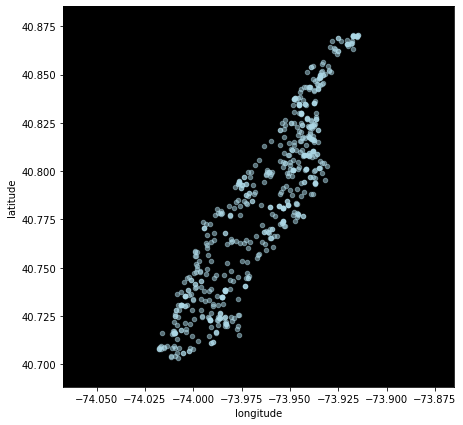

In [0]:
# -- plot Manhattan abandoned vehicles
ax = nyc311_2.plot.scatter("longitude", "latitude", color="lightblue", alpha=0.5, figsize=(7, 7))
ax.set_facecolor("black")
ax.axis("equal")

And we can include add the remaining 4 boroughs:

In [0]:
# -- modify query to subselect each borough
print("loading BRONX")
query3 = endp + "?Complaint+Type=Abandoned+Vehicle&borough=BRONX"
nyc311_3  = pd.read_json(query3)

print("loading BROOKLYN")
query4 = endp + "?Complaint+Type=Abandoned+Vehicle&borough=BROOKLYN"
nyc311_4  = pd.read_json(query4)

print("loading QUEENS")
query5 = endp + "?Complaint+Type=Abandoned+Vehicle&borough=QUEENS"
nyc311_5  = pd.read_json(query5)

print("loading STATEN ISLAND")
query6 = endp + "?Complaint+Type=Abandoned+Vehicle&borough=STATEN+ISLAND"
nyc311_6  = pd.read_json(query6)

loading BRONX
loading BROOKLYN
loading QUEENS
loading STATEN ISLAND


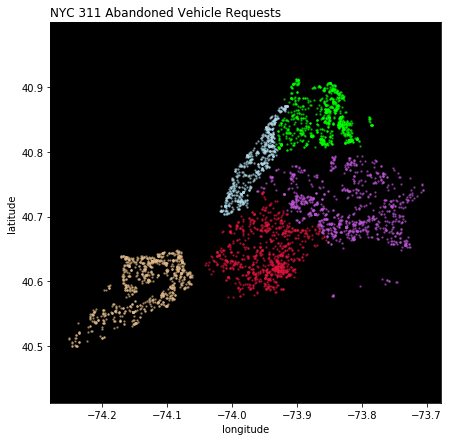

In [0]:

# -- plot all abandoned vehicles
ax = nyc311_2.plot.scatter("longitude", "latitude", c="lightblue", s=2, alpha=0.5)
nyc311_3.plot.scatter("longitude", "latitude", c="lime", s=2, alpha=0.5, figsize=(7, 7), ax=ax)
nyc311_4.plot.scatter("longitude", "latitude", c="crimson", s=2, alpha=0.5, figsize=(7, 7), ax=ax)
nyc311_5.plot.scatter("longitude", "latitude", c="mediumorchid", s=2, alpha=0.5, figsize=(7, 7), ax=ax)
nyc311_6.plot.scatter("longitude", "latitude", c="burlywood", s=2, alpha=0.5, figsize=(7, 7), ax=ax)
ax.set_facecolor("black")
ax.set_title("NYC 311 Abandoned Vehicle Requests", loc="left")
dum = ax.axis("equal")